# Исследование надежности заемщиков


Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv(r"C:\Users\nssavinov\Desktop\Пректы практикум\2 Предобработка данных\data.csv")
except:
    print('Некорректная ссылка на файл')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [22]:
amount = data.groupby('children')['debt'].count()
debt_amount = data.groupby('children')['debt'].sum()
total = debt_amount/amount *100
common = pd.DataFrame ({'amount': amount, 'debt_amount': debt_amount, 'total': total})
display (common)


,amount,debt_amount,total
children,,,
0,14091,1063,7.543822
1,4808,444,9.234609
2,2052,194,9.454191
3,330,27,8.181818
4,41,4,9.756098
5,9,0,0.000000


In [23]:
common =data.groupby('children')['debt'].agg(['count', 'sum', 'mean'])
display (common)

,count,sum,mean
children,,,
0,14091,1063,0.075438
1,4808,444,0.092346
2,2052,194,0.094542
3,330,27,0.081818
4,41,4,0.097561
5,9,0,0.000000


**Вывод:**
Первоначально кажется, что прямая зависимость от количества детей есть, но данные результаты были бы действительно релевантны, если бы количество в поле amount было бы равно между всеми значениями, т.е. результаты где 14к людей более приблежены к правдивой отметке, чем где 41.  
Т.е. из этого всего можно сделать вывод, что чем меньше у людей детей, то тем больше вероятность что они не попадут в категорию debt, но прямой корреляции/зависимости нет. +- все лежит в рамках погрешности. (Показательный пример с 5 детьми) 

Однозначно можно сделать вывод, что с увеличением количества детей увеличивается число невозврата кредита, т.е. платежеспособность клента уменьшается. 

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [24]:
family_debt = pd.DataFrame({'family_debt' : data.groupby('family_status')['debt'].sum(),\
                           'family_count' : data.groupby('family_status')['debt'].count()})
family_debt ['total'] = family_debt ['family_debt'] /family_debt ['family_count'] *100
display (family_debt)

,family_debt,family_count,total
family_status,,,
Не женат / не замужем,273,2796,9.763948
в разводе,84,1189,7.064760
вдовец / вдова,63,951,6.624606
гражданский брак,385,4134,9.313014
женат / замужем,927,12261,7.560558


**Вывод:** 
результаты данного исследования более релевантны, т.к. общее количество в выборке отличается не во много раз.
Результатом исследования можно сказать, что охотнее всего попадают в должники люди с статусом "Не женат / не замужем" и "Гражданский брак", что в общем то, поддается логискому объяснению. 
Меньше всего "вдова" "Женат/замужем" "в разводе"
зависимость между данными категриями есть

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [25]:
income_debt = data.groupby('total_income_category')['debt'].agg(['count','sum', 'mean'])
display (income_debt)

,count,sum,mean
total_income_category,,,
A,25,2,0.080000
B,5014,354,0.070602
C,15921,1353,0.084982
D,349,21,0.060172
E,22,2,0.090909


**вывод**\
согласно полученному датафрейму, самой неплатежеспособной группой оказалась греппа с наибольшим доходом, т.е. группа Е. После нее группа С, А, В, Д. \ 
Но вывод сделать можно следующий, скорее всего в группе Е имеется так называемый выброс из-за малого кол-ва данных. \
Могу предположить что все-таки наименее нестабильной группой будет группа с средним доходом С. \
Причина: получают не так много денег, а жить начинают на широкую ногу, в то время как А пытаются ужаться.

Наилучшей группой для формирования выводов являются группы В и С, по остальным категориям недостаточно данных для формирования корректных выводов\
Рассматривая группу В и С можно сделать вывод что при увеличении дохода, способность выплатить крудит тоже увеличивется.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [26]:
purpose_category_analys = pd.DataFrame ({'amount' : data.groupby('purpose_category')['debt'].count(),\
                                  'amount_debt' : data.groupby('purpose_category')['debt'].sum()})
purpose_category_analys ['total'] = purpose_category_analys['amount_debt'] / purpose_category_analys['amount'] *100
display (purpose_category_analys)

,amount,amount_debt,total
purpose_category,,,
операции с автомобилем,4279,400,9.347978
операции с недвижимостью,10751,780,7.255139
получение образования,3988,369,9.252758
проведение свадьбы,2313,183,7.911803


**Вывод:** 
Вывод однозначный, что люди занимающие деньги на приобритение квартиры наиболее платеже-способны и чаще возвращают кредит. наименее стабильная причина покупки - покупка автомобиля. 

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* 
1. человеческий фактор
2. неправильно настроена ФМ и ЛМ в БД 
3. Неправильно настроены алгоритмы интеграции, преобразование данных
4. неправильно произошла выгрузка из бд
5. неправильно настроена форма ввода, которая подгружает инфу в бд

В нашем случае в 2 полях были изначально пропуски, в 1: "days_employed" и "total_income", по виду эти пропуски относятся к 1 категории. Скорее всего, были допущенны при ручном вводе информации. 

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* 
Простыми словами, медиана более стабильно реагирует на изменение какого либо показателя и отображает более правильную ситуацию, в то время как, среднее может колосально изменяться от выбросов. 

### Шаг 4: общий вывод.

Напишите ваш общий вывод.

Проделана следующая работа: 
мы очистили таблицу от пропусков и заменили их меданными занчениями по категориям, подготовили данные и категоризовали их, на основе данных категорий провели анализ (представленный ниже). 


был проделан следующий анализ и получены следующие результаты: \

1. Влияние кол-ва детей на платежеспособность \
При увеличении количества детей, платежеспособность по кредытным обязательствам у клиента снижается, прикладываю скрин, особенно это видно на примере 0-1-2-4 ребенка. \
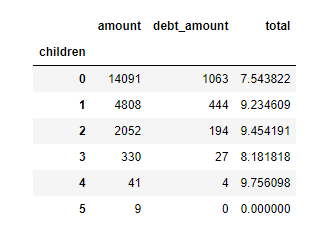

2. Влияние семейного положения на платежеспособность\
Наиболее платежеспособними людьми оказались люди побывавшие в официальном браке, после них уже женатые люди. \
наименее платежеспособными оказались люди в гражданском браке и холостые. 
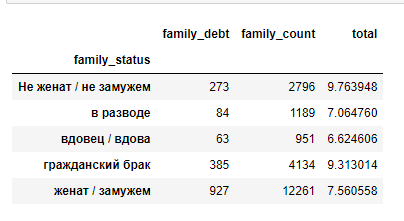

3. Влияние дохода на платежеспособность \
Наилучшей группой для формирования выводов являются группы В и С, по остальным категориям недостаточно данных для формирования корректных выводов\
Рассматривая группу В и С можно сделать вывод что при увеличении дохода, способность выплатить крудит тоже увеличивется.\
Рекомендации: 
Рассмотреть другую категризацию по данным.
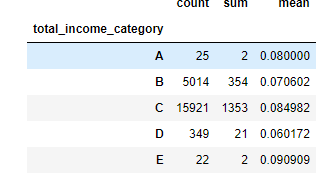

4. Влияние причины кредита на платежеспособность\
Люди у которых причинами является операция с недвижимостью или свадьба, являются наиболее надежными заемщиками
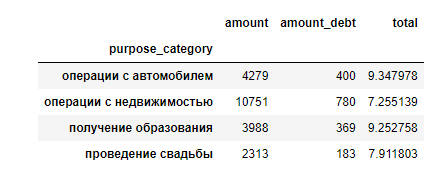

**Портрет надежного заемщика**\
Нет детей, желательно побывавший в официальном браке или находящийся в нем, с наибольшим доходом, причина кредита: операция с недвижимостью\

**Портрет рискованного заемщика**\
Большое количество детей, чем больше тем хуже, не состоявший в официальном браке или находящийся в гражданском, с наименьшим доходом, с причиной кредита: обучение или автомобиль\

**Рекомендации**\
В анкете сделать поля о доходе и стаже обязательными к заполнению, добавить автопроверку на формат вводимых пользователем данных